In [2]:
import torch
import random

In [ ]:

v0 = torch.tensor([random.random()-0.5, random.random()-0.5, random.random()-0.5])  # 原点
v1 = torch.tensor([1.0, 0.0, 0.0])  # x軸方向
v2 = torch.tensor([0.0, 1.0, 0.0])  # y軸方向
v3 = torch.tensor([0.0, 0.0, 1.0])  # z軸方向

l1 = torch.sqrt(torch.sum((v0 - v1)**2))
l2 = torch.sqrt(torch.sum((v0 - v2)**2))
l3 = torch.sqrt(torch.sum((v0 - v3)**2))
l4 = torch.sqrt(torch.sum((v1 - v2)**2))
l5 = torch.sqrt(torch.sum((v1 - v3)**2))
l6 = torch.sqrt(torch.sum((v2 - v3)**2))
if torch.isnan(l1) or torch.isnan(l2) or torch.isnan(l3):
    print("Error in edge_length")

M = torch.tensor([
        [v1[0]-v0[0], v1[1]-v0[1], v1[2]-v0[2]],
        [v2[0]-v0[0], v2[1]-v0[1], v2[2]-v0[2]],
        [v3[0]-v0[0], v3[1]-v0[1], v3[2]-v0[2]]
    ], dtype=torch.float64)

# 行列式を計算
det_M = torch.det(M)

# 体積を計算
v = torch.tensor(torch.abs(det_M)/ 6)

length_tensor = torch.tensor([l1, l2, l3, l4, l5, l6], dtype=torch.float32)
loss = 1-((36.0*torch.sqrt(torch.tensor(2.))*v)/(torch.sum(length_tensor ** 2)))



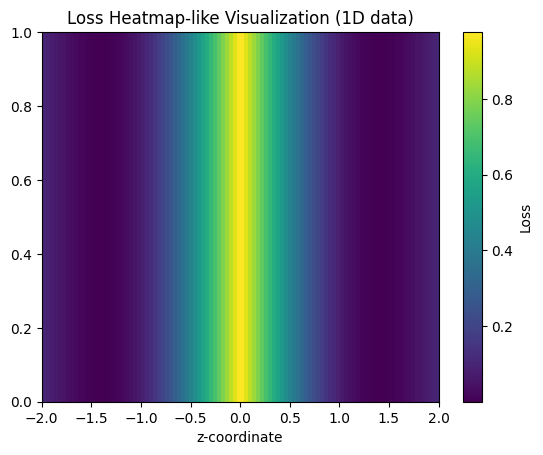

In [19]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

# 固定された頂点
v1 = torch.tensor([0.0, 1, 0.0])  # x軸方向
v2 = torch.tensor([torch.sqrt(torch.tensor(3.))/2, -0.5, 0.0])  # y軸方向
v3 = torch.tensor([-torch.sqrt(torch.tensor(3.))/2, -0.5, 0.0])  # z軸方向

# メッシュグリッドを作成
x_fixed = 0.0
y_fixed = 0.0
z_range = np.linspace(-2, 2, 100)  # z座標を固定
loss_values = np.zeros(len(z_range))

# Loss を計算
for i, z in enumerate(z_range):
    # v0 の座標
    v0 = torch.tensor([x_fixed, y_fixed, z], dtype=torch.float64)
    
    # 辺の長さを計算
    l1 = torch.sqrt(torch.sum((v0 - v1)**2))
    l2 = torch.sqrt(torch.sum((v0 - v2)**2))
    l3 = torch.sqrt(torch.sum((v0 - v3)**2))
    l4 = torch.sqrt(torch.sum((v1 - v2)**2))
    l5 = torch.sqrt(torch.sum((v1 - v3)**2))
    l6 = torch.sqrt(torch.sum((v2 - v3)**2))
    
    # 辺の長さテンソル
    length_tensor = torch.tensor([l1, l2, l3, l4, l5, l6], dtype=torch.float32)
    
    # 四面体の体積を計算
    M = torch.tensor([
        [v1[0] - v0[0], v1[1] - v0[1], v1[2] - v0[2]],
        [v2[0] - v0[0], v2[1] - v0[1], v2[2] - v0[2]],
        [v3[0] - v0[0], v3[1] - v0[1], v3[2] - v0[2]]
    ], dtype=torch.float64)
    det_M = torch.det(M)
    v = torch.abs(det_M) / 6
    
    # Loss の計算
    loss = 1 - ((36.0 * torch.sqrt(torch.tensor(2.0)) * v) / torch.sum(length_tensor ** 3))
    loss_values[i] = loss.item()

# ヒートマップで可視化
plt.imshow(loss_values.reshape(1, -1), cmap="viridis", aspect="auto", extent=[-2, 2, 0, 1])
plt.colorbar(label="Loss")
plt.title("Loss Heatmap-like Visualization (1D data)")
plt.xlabel("z-coordinate")
plt.show()
